<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [4]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [5]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [6]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'prefer_Attach_followers', 'prefer_Attach_followees', 'svd_dot'],
      dtype='object')

In [7]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [8]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.8954770370214067 test Score 0.861424847958297
Estimators =  50 Train Score 0.9191674329181644 test Score 0.9037030756512708
Estimators =  100 Train Score 0.9186611856519835 test Score 0.9116509751176866
Estimators =  250 Train Score 0.9202097653719992 test Score 0.913554793511876
Estimators =  450 Train Score 0.9207596047381286 test Score 0.9140081176000505


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

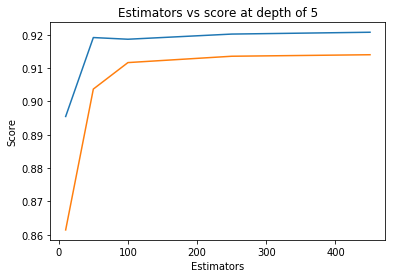

In [9]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8970984488301205 test Score 0.8739228254871162
depth =  9 Train Score 0.9564212442598975 test Score 0.9217814450439015
depth =  11 Train Score 0.962159527146426 test Score 0.923190421988955
depth =  15 Train Score 0.9652414017135664 test Score 0.9182149826079578
depth =  20 Train Score 0.9647085101630556 test Score 0.9204843763231434
depth =  35 Train Score 0.9647968816614897 test Score 0.9214305352875242
depth =  50 Train Score 0.9647968816614897 test Score 0.9214305352875242
depth =  70 Train Score 0.9647968816614897 test Score 0.9214305352875242
depth =  130 Train Score 0.9647968816614897 test Score 0.9214305352875242


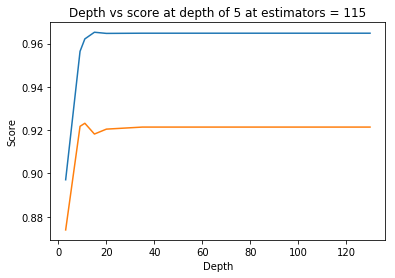

In [10]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [12]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,120),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

best_depth_RF = rf_random.best_params_['max_depth']
best_base_learner_RF = rf_random.best_params_['n_estimators']

print('mean test scores', rf_random.cv_results_['mean_test_score'])
print('mean train scores', rf_random.cv_results_['mean_train_score'])

mean test scores [0.96324367 0.96398278 0.96118124 0.96264219 0.96412555]
mean train scores [0.96412382 0.96486329 0.96172329 0.96344041 0.96514544]


In [13]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=111, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [14]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [15]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [17]:
from sklearn.metrics import f1_score

F1_score_train_RF = f1_score(y_train,y_train_pred)
F1_Score_test_RF = f1_score(y_test,y_test_pred)
print('Train f1 score', F1_score_train_RF)
print('Test f1 score', F1_Score_test_RF)

Train f1 score 0.9651273723738963
Test f1 score 0.9241283300639118


In [18]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


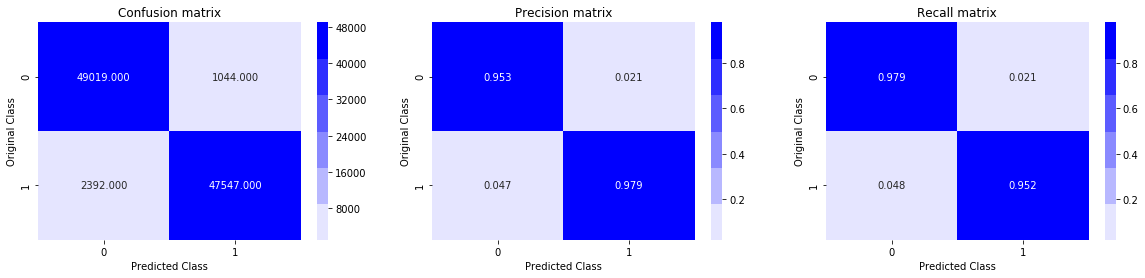

Test confusion_matrix


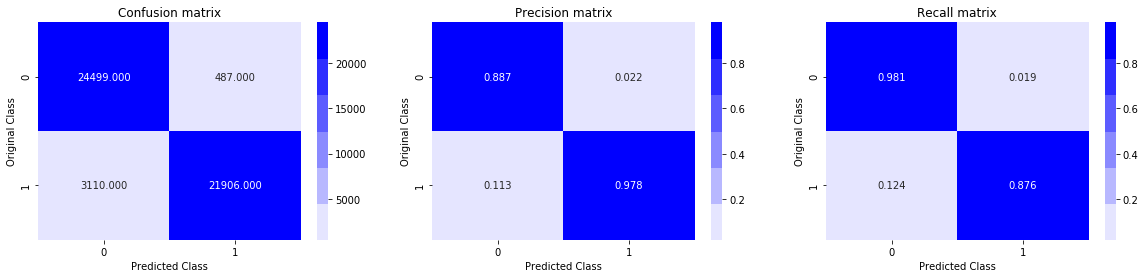

In [19]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

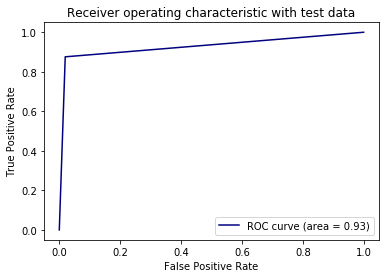

In [20]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

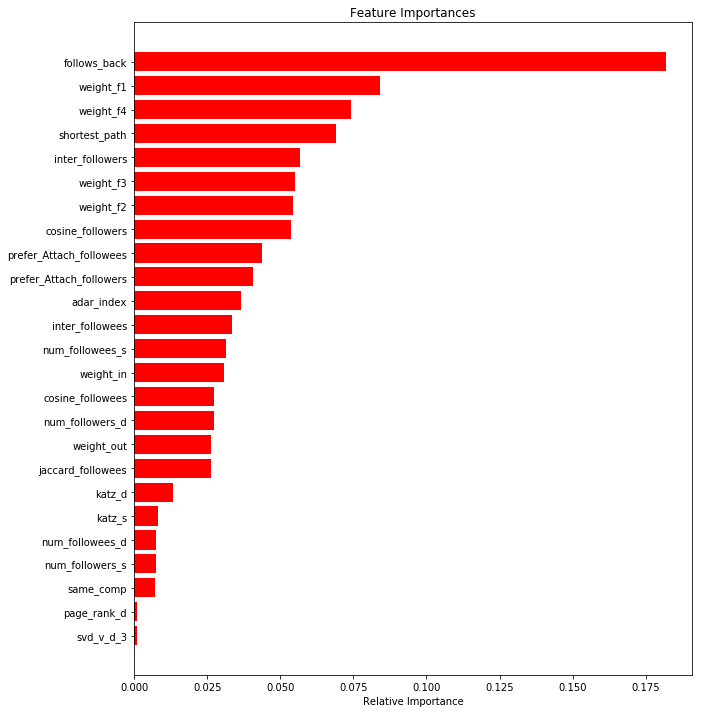

In [21]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Applying GBDT using XGBOOST

In [22]:
import xgboost as xgb
from sklearn.metrics import f1_score, roc_curve, auc

In [25]:
max_depth =  [5, 10, 15, 20, 25]
base_learners =  [100, 150, 200, 250, 300]
parameters = { 'max_depth' : max_depth, 'n_estimators' : base_learners} 

clf = xgb.XGBClassifier(random_state=0, subsample=0.7, n_jobs=-1)
model = RandomizedSearchCV(clf, parameters, cv = 5, scoring='f1')
model.fit(df_final_train, y_train)

print("Best Estimator: ", model.best_estimator_) 
print("Best param: ", model.best_params_)
print("Best Score: ", model.best_score_)

best_depth_xgb = model.best_params_['max_depth']
best_base_learner_xgb = model.best_params_['n_estimators']

Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)
Best param:  {'n_estimators': 300, 'max_depth': 15}
Best Score:  0.9829709350727962


In [27]:
clf = xgb.XGBClassifier(n_estimators = best_base_learner_xgb, max_depth=best_depth_xgb, random_state=0, n_jobs=-1)
clf.fit(df_final_train, y_train)

y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [28]:
F1_score_train_xgb = f1_score(y_train,y_train_pred)
F1_Score_test_xgb = f1_score(y_test,y_test_pred)
print('Train f1 score', F1_score_train_xgb)
print('Test f1 score', F1_Score_test_xgb)

Train f1 score 1.0
Test f1 score 0.9246891274311828


Train confusion_matrix


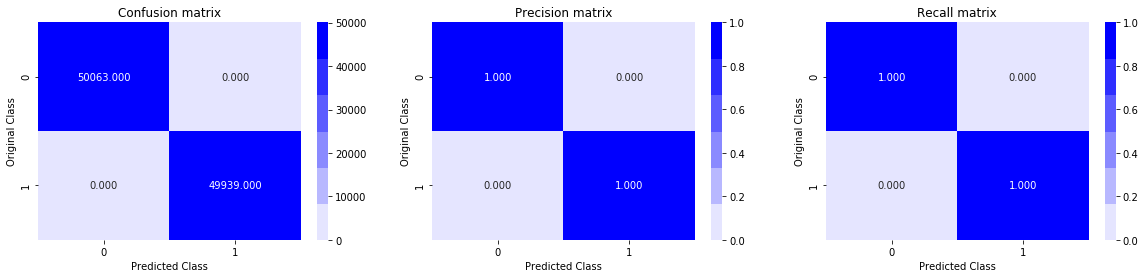

Test confusion_matrix


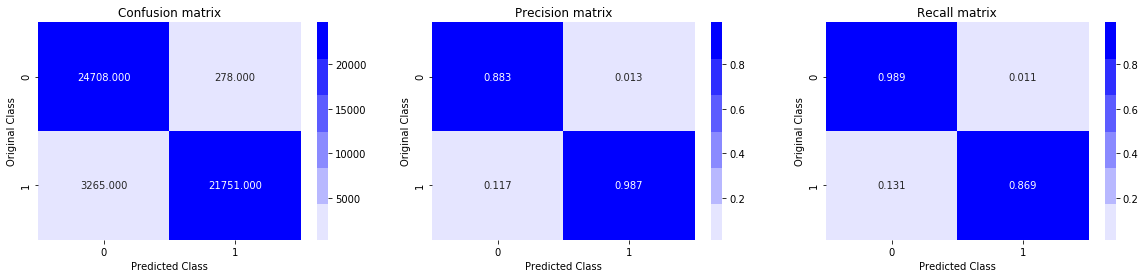

In [29]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

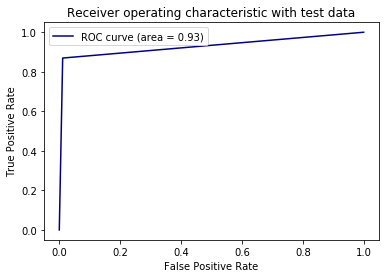

In [30]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

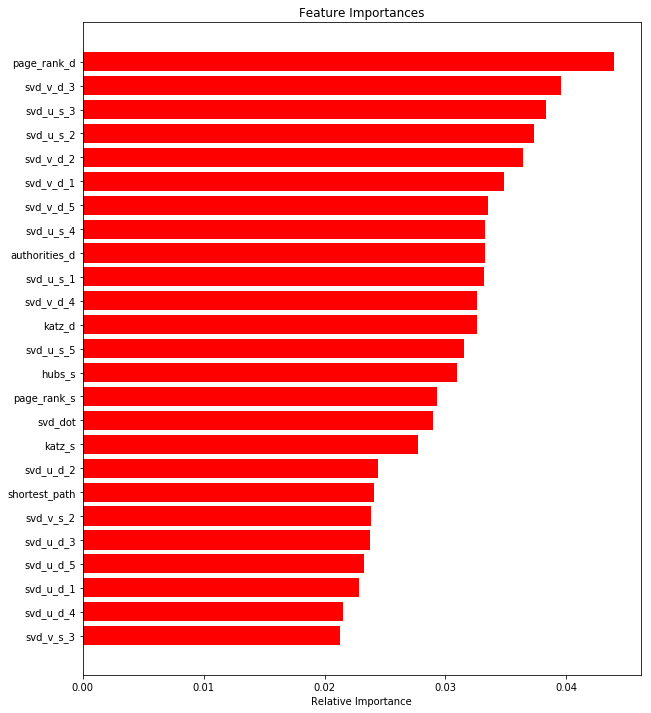

In [31]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
from prettytable import PrettyTable 

table = PrettyTable()
table.field_names = ["Model", "base_learners", "max_depth", "Train f1-Score","Test f1-Score"]
table.add_row(['Random Forest',best_base_learner_RF, best_depth_RF, F1_score_train_RF, F1_Score_test_RF])
table.add_row(['XGBOOST',best_base_learner_xgb, best_depth_xgb, F1_score_train_xgb, F1_Score_test_xgb])
print(table)

+---------------+---------------+-----------+--------------------+--------------------+
|     Model     | base_learners | max_depth |   Train f1-Score   |   Test f1-Score    |
+---------------+---------------+-----------+--------------------+--------------------+
| Random Forest |      111      |     14    | 0.9651273723738963 | 0.9241283300639118 |
|    XGBOOST    |      300      |     15    |        1.0         | 0.9246891274311828 |
+---------------+---------------+-----------+--------------------+--------------------+


## Conclusion

* Initially had just 2 feature in our data-set.

* Created some datapoints which were not present in our original dataset to generate the class labels.

* Did some feature engineering on dataset like finding shortest path, kartz centrality, jaccard distances, page rank, preferential attachements etc.

* Plotted confusion matrix and pretty-table for Random Forest and XGBoost algorithm using optimized hyperparameters.
* Both model perform well based on F1 Score